### Milestone 2 Documentation 

Michael Downs, Cameron Hickert, Dianne Lee, Wisoo Song 

In [1]:
import numpy as np
import os
import re
import sys
from pathlib import Path 
sys.path.append(os.path.dirname(Path(os.getcwd())))
sys.path.append(os.path.dirname(Path(os.getcwd()))+'\\ARRRtomatic_diff')
from ARRRtomatic_diff import functions as adfuncs

#### Introduction

Our software package is an automatic differentiation suite that solves the problem of numerically computing the derivative for an arbitrary function as long as that function can be expressed as the composition of elementary functions. Precise computation of the gradient is of fundamental importance in the sciences and applied mathematics. Many optimization algorithms rely on gradient information. Indeed, the backpropagation algorithm, which is used to train neural networks, is simply gradient descent on the network's weights. Derivatives are also used in root finding methods such as Newton's method, which are used to numerically solve ordinary differential equations when using implicit methods, among other things. Reliable solutions to ODEs are integral to many of the applied sciences. Automatic differentiation offers an improvement over finite difference methods in that automatic differentiation is exact to machine precision and does not suffer nearly as much from numerical stability issues. AD is also better than symbolic differentiation in that it is less computationally expensive.

#### Background

A derivative of a function represents the instantaneous rate of change of that function at a particular point. A vector containing each partial derivative of a multivariate function is known as a gradient and gives the direction of greatest increase at a particular point. A Jacobian of a vector-valued function is a matrix where each row contains the gradient of the corresponding function.

Forward-mode automatic differentiation of a function can be conceptualized as 

1. Dividing that function into a composition of elementary operations through a computational graph. Basic elementary operations include:

    1. Addition
    2. Multiplication
    3. Subtraction
    4. Division
    5. Exponentiation
    6. Logarithms
    7. Trigonometric functions
    
2. Iteratively applying the chain rule, a result from calculus for computing the derivative of a composite function, at each step of the computational graph from beginning to end in order to propagate the exact numeric values of the partial derivatives all the way until the final step of the computational graph, which represents the output of the function. The partial derivatives at the final step are with respect to the function's variables and so represent the numeric value of the gradient for a chosen value of the function's variables.

The chain rule describes the differentiation of a composite function, where the derivatives are taken at each step as described by the following diagram: 

![chain rule](./chain_rule.png)

The procedure described above allows for computation of particular classes of multivariate, scalar-valued functions, and can easily be extended to vector-valued functions as well -- simply apply the procedure component-wise to each function.

We illustrate both the graph structure of computations as well as the propagation of the derivatives via the chain rule with an example. As each step in automatic differentiation involves a single elementary function, each of these "steps" can be used as input into an outer function. An example of forward-mode automatic differentiation of the function *sin(2x)* can be seen below, where *x<sub>n</sub>* represents the *n*th step of the function. 

![graph struct](./graph_structure.PNG)

| trace | func        | value   | deriv                 |   dx1 |
|-------|-------------|---------|-----------------------|-------|
| *x<sub>1</sub>* | *x<sub>1</sub>*       | 5     | 1           |     1 |
| *x<sub>2</sub>* | 2*x<sub>1</sub>*      | 10    | 2d*x<sub>1</sub>*          |     2 |
| *x<sub>3</sub>* | sin(*x<sub>2</sub>*) | -.544 | cos(*x<sub>2</sub>*)*dx<sub>2</sub>* | -1.68 |

Essentially, we divide the composite function sin(2x) into the elementary operations *x<sub>1</sub>*=x, *x<sub>2</sub>*=2*x<sub>1</sub>*, and *x<sub>3</sub>*=sin(*x<sub>2</sub>*), and we maintain the derivatives along the way. 

It is also useful to give some background on dual numbers. Dual numbers are numbers of the form *a+bε*. In the case of automatic differentiation, the *ε* value can be used to represent the derivative of the function at a particular value *x*. For example, an element *x* would be represented as the vector *(x,x')*. A simple application of a function *f* might look like *f((x,x')) = (f(x), f(x)x')*, making use of the chain rule as described above. 

Forward mode is more specifically implemented using these general concepts. We first introduce a seed vector p in order to calculate the directional derivative in the direction of p. For example, for a simple function *f(x,y)*, p = (1,0) would give us $\frac{\delta f}{\delta x}$ while p = (0,1) would give us $\frac{\delta f}{\delta y}$. The forward mode calculates the product of the function gradient with this seed vector. 

In particular, the forward mode computes the Jacobian-vector product. The Jacobian matrix is defined $J = \frac{\delta f_i}{\delta x_j}$. Thus we can see that the forward mode of automatic differentiation computes the matrix-vector product $Jp$ for the seed bector $p$. 

Given a function $f: \mathbb{R}^m \rightarrow \mathbb{R}^n$, forward mode is more efficient when $n >> m$ as this correponds to the case where the number of functions to evaluate is greater than the number of inputs. Reverse mode on the other hand is more efficient when $n << m$, or the number of inputs is larger than the number of functions. Reverse mode in this case computes the product $J^Tp$ instead. 

#### How To Use

##### Installation

   We utilized the setuptools module to package and upload our module on TestPyPI. This method is much more robust than simply freezing the dependencies using 'pip freeze > requirements.txt'. In addition to solving messy dependency issues, including the setup.py allows the package to be directly installed to venv or conda env by running the following code:
    <p>
    <center> pip install arrrtomatic </center>
    </p>
    Detailed information about the project and python kernel compatibility can be found at: https://test.pypi.org/project/arrrtomatic/#data . Notice that arrrtomatic only supports python kernel 3.6 and up.

<img src="./PyPI.png" alt="drawing" width="400"/>

##### Step-by-step demo of the installation
1. If you have not created an environment for your project, create one. We recommend python 3.6 and conda envs.<br/>
<img src="./conda_create.png" alt="drawing" height="150"/><br/>
2. Activate the environment
<img src="./conda_activate.png" alt="drawing" height="150"/><br/>
3. pip install -i https://test.pypi.org/simple/ arrrtomatic (Don't forget the space between the url link and arrrtomatic!)<br/>
<img src="./successful_install3.png" alt="drawing" width="550"/><br/>
4. import the module with:<br/>
<center> from ARRRtomatic_diff import Autodiff </center><br/>
<img src="./assertion_success2.png" alt="drawing" width="550"/><br/>




##### Using the arrrtomatic for Newton's Method
    

    
    

In [2]:
import sys
!{sys.executable} -m pip install arrrtomatic

In [3]:
#Import the modules!
from ARRRtomatic_diff import AutoDiff
from ARRRtomatic_diff.functions import sin, exp, sqrt, log

In [4]:
def f(x, g):
    x = AutoDiff(name='x', val=x)
    auto_diff_results = g(x)

    return auto_diff_results['val'], auto_diff_results['d_x']

def do_newtons_method(x, f,g, tol=1e-6, verbose=0):
    """
    x: initial guess
    f: function that returns value and derivative of f at x
    tol: terminate when the absolute value of f at x is less than or equal to the tol
    """
    num_iters = 1
    while abs(f(x,g)[0]) > tol:
        val, deriv = f(x,g)

        if verbose > 0:
            print(f"Iteration {num_iters} | x: {x:2f} | f(x): {val:2f} | deriv: {deriv:2f}")

        x = x - val/deriv

        

        num_iters += 1

    if verbose > 0:
        print(f"Converged to {x} after {num_iters} iterations\n")

    return x

In [8]:
sin1=do_newtons_method(0.2, f, sin,verbose=1)
sin2=do_newtons_method(2.2, f, sin, verbose=1)

sqrt1=do_newtons_method(0.2, f, log,verbose=1)




Iteration 1 | x: 0.200000 | f(x): 0.198669 | deriv: 0.980067
Iteration 2 | x: -0.002710 | f(x): -0.002710 | deriv: 0.999996
Converged to 6.634450606078646e-09 after 3 iterations

Iteration 1 | x: 2.200000 | f(x): 0.808496 | deriv: -0.588501
Iteration 2 | x: 3.573823 | f(x): -0.418897 | deriv: -0.908034
Iteration 3 | x: 3.112500 | f(x): 0.029089 | deriv: -0.999577
Iteration 4 | x: 3.141601 | f(x): -0.000008 | deriv: -1.000000
Converged to 3.141592653589793 after 5 iterations

Iteration 1 | x: 0.200000 | f(x): -1.609438 | deriv: 5.000000
Iteration 2 | x: 0.521888 | f(x): -0.650303 | deriv: 1.916121
Iteration 3 | x: 0.861273 | f(x): -0.149344 | deriv: 1.161072
Iteration 4 | x: 0.989899 | f(x): -0.010153 | deriv: 1.010204
Iteration 5 | x: 0.999949 | f(x): -0.000051 | deriv: 1.000051
Converged to 0.9999999986897259 after 6 iterations



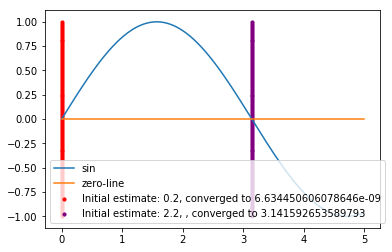

In [13]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
x_s =np.linspace(0, 5, 500)
y_s =np.linspace(-1,1, 100)

sin_dots = np.sin(x_s)
plt.plot(x_s,sin_dots)
plt.plot(x_s,[0]*500)
plt.scatter([sin1]*100, y_s, color="red", s=10)
plt.scatter([sin2]*100, y_s, color="purple", s=10)
plt.legend(["sin", "zero-line", f"Initial estimate: 0.2, converged to {sin1}", f"Initial estimate: 2.2, , converged to {sin2}"])

#### Software Organization 



High-level overview of how the software is organized.
Directory structure
Basic modules and what they do
Where do tests live? How are they run? How are they integrated?
How can someone install your package? At this point, it is okay if your package isn't on PyPI. If it's not, then you should describe how someone can download and install your package manually.

#### Implementation Details



Description of current implementation. This section goes deeper than the high level software organization section.
Try to think about the following:
Core data structures
Core classes
Important attributes
External dependencies
Elementary functions
This is similar to what you did for Milestone 1, but now you've actually implemented it.
What aspects have you not implemented yet? What else do you plan on implementing?

We plan on implementing the forward mode of automatic differentiation through operator overloading and defining custom functions for cases where operator overloading does not make sense (i.e. exp, sin, etc.). That is, for each of the elementary operations (add, subtract, etc.), we will overload the appropriate dunder method in our core auto diff variable class. Note that for each of the elementary operations, this also includes overloading the reverse operands (`__rmul__`, `__radd__`, etc.). The overloaded methods will appropriately update both the value and all the partial derivatives. We will account only for the real numbers.

Our core data structure will be a representation of a particular row in the trace table, which in turn corresponds to a step in the computational graph. Users will instantiate named variables that represent root nodes in the computational graph (which corresponds to the inputs to the *n* initial rows of the trace table, where *n* represents the number of input variables). Users will then be able to create arbitrarily complicated functions by manipulating these variables with elementary operations. At every step the package will be able to output the derivative and the function value. Once the user has finished composing a function, our package's output will then be the final derivatives and function value.  

This will be implemented via the AutoDiffVariable class, which will handle all of the operator overloading. AutoDiffVariable objects can be combined through elementary operations to yield a new AutoDiffVariable object that has the appropriate value and partial derivatives. 

The AutoDiffVariable class will expose a few methods, namely get_named_variables, get_value, and get_gradient. The user will access get_gradient when they have finished writing their computational graph. As for attributes, the AutoDiffVariable class will simply maintain the names of its variables as well as a dictionary which contains the value of the function and its partial derivatives.

We will use NumPy for elementary computations. Beyond benefitting our package with its speed and versatility, NumPy's prevalence among the Python programming community will allow those interested to more easily understand how our packages operates "under the hood," especially to understand which operators we have overloaded.  

Beyond NumPy, our package will not have other external dependencies.

We will create additional modules for each elementary function. Each module will contain a function that will update an AutoDiffVariable object accordingly. For example, "f = adfuncs.exp(x)" would exponentiate the value and then multiply each partial derivative by the new exponentiated value. The variable "f" would then point to that updated value. 

We expect this approach to be robust enough to handle vector valued functions with vector inputs. We envision creating convenience methods if a user wishes to work in a multivariate setting (i.e. we'll create convenience classes to create vectors of AutoDiffVariables and allow for broadcasting operations on iterables of AutoDiffVariable objects).

#### Future Features 

TODO